# Cirq Getting Started

Cirq is the open source quantum computer frameowkr by Google. It contains definitions for qubits, circuits and simulators. It also contains interfaces for running your circuit on real hardware, for example on systems from IonQ, AQT and Pasqal.

To get a bit of a feel for how the library works, we start with the [Hello Qubit](https://quantumai.google/cirq/start/start) example from the docs.

In [9]:
import cirq
import cirq_google
import qsimcirq

import matplotlib.pyplot as plt

# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit that applies a square root of NOT gate, then measures the qubit.
circuit = cirq.Circuit(cirq.X(qubit) ** 0.5, cirq.measure(qubit, key='m'))
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=10100111101010010011


This circuit prepares a quantum state by applying the `Sqrt(Not)` gate and then measures that state. The circuit is simulated 20 times. Each digit in the bitstring 'm' is the result of one of those measurements. 

We can also view the final state vector of the circuit, but this only works when the circuit does not contain measurements. As we can see from the state vector and the simulation, they are in agreement. You would expect an equal distribution of $|0\rangle$ and $|1\rangle$

[0.5+0.5j 0.5-0.5j]


p:\02_Poetry\Cache\virtualenvs\quantum-wSpM9I4J-py3.12\Lib\site-packages\cirq\vis\state_histogram.py:109: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


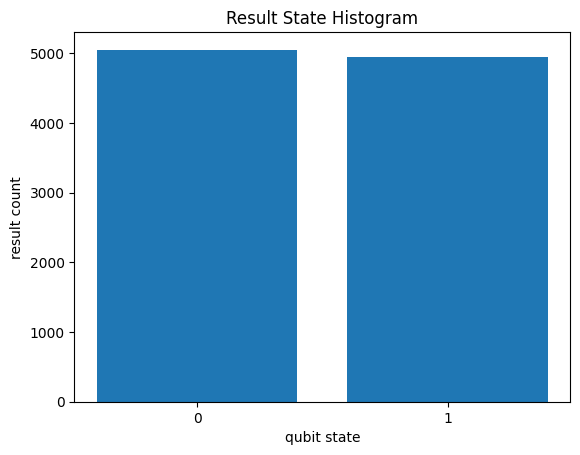

In [11]:
qubit = cirq.GridQubit(0, 0)
circuit = cirq.Circuit(cirq.X(qubit) ** 0.5)
print(circuit.final_state_vector())

circuit.append(cirq.measure(qubit, key="m"))
result = simulator.run(circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result)
plt.show()

How Cirq works is by defining qubits on a grid, this is why we use `GridCubit(row: int, col: int)`. These qubits use row-major ordering and represent the way google builds quantum chips. Cirq also contains interfaces to other manufacturer's backends, and these interfaces will contain different types of qubits to define. For this tutorial we will stay firmly within Cirq and use `GridQubit`s.

Afterwards we define a cricuit by passing `Circuit()` a list of gates or moments. Gates are single operations on one or more qubits, while moments are abstract time slices of parallel operations on multiple qubits. This is explained [here](https://quantumai.google/cirq/build/circuits) in detail.

Another way of creating circuits is by first defining an empty circuit and then using the `append()` method to add operations. Where each call will add new moments ('time' slices) according to the specified [`InsertStrategy`](https://quantumai.google/reference/python/cirq/InsertStrategy)

### Simulation

Cirq also contains simulation hardware named a [Quantum VM](https://quantumai.google/cirq/simulate/quantum_virtual_machine). This includes advanced features such as realistic noise modeling. But we can also run ideal simulations and noisy simulations using classical simulators. 

The material below is based on [Cirq - Simulate a circuit](https://quantumai.google/cirq/simulate)

### Classical simulation

#### Exact Simulation


#### Noisy Simulation


#### Parametrizing circuits


#### Visualising Results

### QVM


In [10]:
# Choose a processor ("rainbow" or "weber")
processor_id = "weber"
# Load the median device noise calibration for your selected processor.
cal = cirq_google.engine.load_median_device_calibration(processor_id)
# Create the noise properties object.
noise_props = cirq_google.noise_properties_from_calibration(cal)
# Create a noise model from the noise properties.
noise_model = cirq_google.NoiseModelFromGoogleNoiseProperties(noise_props)
# Prepare a qsim simulator using the noise model.
sim = qsimcirq.QSimSimulator(noise=noise_model)

In [11]:
# Package the simulator and device in an Engine.
# The device object
device = cirq_google.engine.create_device_from_processor_id(processor_id)
# The simulated processor object
sim_processor = cirq_google.engine.SimulatedLocalProcessor(
    processor_id=processor_id, sampler=sim, device=device, calibrations={cal.timestamp // 1000: cal}
)
# The virtual engine
sim_engine = cirq_google.engine.SimulatedLocalEngine([sim_processor])
print(
    "Your quantum virtual machine",
    processor_id,
    "is ready, here is the qubit grid:",
    "\n========================\n",
)
print(sim_engine.get_processor(processor_id).get_device())


Your quantum virtual machine weber is ready, here is the qubit grid: 

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                                    (2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                                    │        │        │        │        │
                                    │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4,

In [12]:
q0 = cirq.GridQubit(4, 4)
q1 = cirq.GridQubit(4, 5)
circuit = cirq.Circuit(cirq.X(q0), cirq.SQRT_ISWAP(q0, q1), cirq.measure([q0, q1], key="measure"))

results = sim_engine.get_sampler(processor_id).run(circuit, repetitions=3000)

print(results.histogram(key="measure"))


Counter({2: 1397, 1: 1268, 0: 269, 3: 66})
